In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

CNN for MNIST classification. A CNN works better with image data due to its structure.

In [ ]:
class MnistCNN(nn.Module):

    def __init__(self):
      super(MnistCNN, self).__init__()

      # Define the NN architecture 
      self.model = nn.Sequential()

      # Conv Layer 1
      self.model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)) # (28, 28, 16)
      self.model.add_module('activation1', nn.ReLU())
      self.model.add_module('pool1', nn.MaxPool2d(kernel_size=2)) 

      # Conv Layer 2
      self.model.add_module('conv2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)) # (14, 14, 32) 
      self.model.add_module('activation2', nn.ReLU())
      self.model.add_module('pool2', nn.MaxPool2d(kernel_size=2)) # (7, 7, 32) coz kernel_size = 2 halved the size of the image 

      self.model.add_module('flatten', nn.Flatten()) # bx7x7x32 = bx1568. Hence 1568 should be the input size in upcoming Linear layer 

      # Linear Layer 1
      self.model.add_module('linear1', nn.Linear(in_features=1568, out_features=128)) # out_features can be anything
      self.model.add_module('activation3', nn.ReLU())

      # Linear Layer 2
      self.model.add_module('linear2', nn.Linear(in_features=128, out_features=10)) # out_features=10 in the final layer 
      self.model.add_module('activation4', nn.LogSoftmax(dim=1)) 

      self.loss = nn.NLLLoss()

    def forward(self, images: torch.Tensor) -> torch.Tensor:
        return self.model(images)

    # Define a cost function that takes predictions and targets as input, and calls self.loss from our model
    def cost(self, predictions: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        return self.loss(predictions, targets.view(-1))
        

At this point the Defining the model is done. Let's Download the DataSets and Train it now!

In [ ]:
if __name__ == '__main__':

    # Control variables
    batch_size = 512
    num_epochs = 1
    learning_rate = 1e-2

    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./Data/mnist/', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size)
    
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) # Defining this train_dataset for later

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./Data/mnist', train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./Data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./Data/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./Data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./Data/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./Data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Data/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./Data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Data/mnist/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



So our data has been collected and preprocessed into training_dataloader and test_dataloader. Now we use these dataloaders to train and optimize the network.

In [ ]:
# Set up the network and optimizer
network = MnistCNN() # network is the object of MnistCNN() class
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

# Train the network 

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader): # train_loader is divided into [batch, (data, target)], where data is bx1x28x28 sized tensor

        # Get the predictions
        preds = network.forward(data) # data being passed is 512x1x28x28

        # Compute the loss
        loss = network.cost(preds, target)

        # Take a gradient step
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

        # Show the loss
        print('Epoch:', '{:3d}'.format(epoch + 1),
              '\tBatch:', '{:3d}'.format(batch_idx + 1),
              '\tLoss:', '{:10.5f}'.format(loss.item()))


Epoch:   1 	Batch: 100 	Loss:    0.04670
Epoch:   1 	Batch: 101 	Loss:    0.06957
Epoch:   1 	Batch: 102 	Loss:    0.10241
Epoch:   1 	Batch: 103 	Loss:    0.05176
Epoch:   1 	Batch: 104 	Loss:    0.12240
Epoch:   1 	Batch: 105 	Loss:    0.06294
Epoch:   1 	Batch: 106 	Loss:    0.07013
Epoch:   1 	Batch: 107 	Loss:    0.04543
Epoch:   1 	Batch: 108 	Loss:    0.05547
Epoch:   1 	Batch: 109 	Loss:    0.10157
Epoch:   1 	Batch: 110 	Loss:    0.05728
Epoch:   1 	Batch: 111 	Loss:    0.06981
Epoch:   1 	Batch: 112 	Loss:    0.04937
Epoch:   1 	Batch: 113 	Loss:    0.06906
Epoch:   1 	Batch: 114 	Loss:    0.03440
Epoch:   1 	Batch: 115 	Loss:    0.03431
Epoch:   1 	Batch: 116 	Loss:    0.02876
Epoch:   1 	Batch: 117 	Loss:    0.09935
Epoch:   1 	Batch: 118 	Loss:    0.18687


In [ ]:
# Compute accuracy on training set
count = 0
for batch_idx, (data, target) in enumerate(train_loader):
    _, preds = torch.max(network.forward(data), dim=1)
    count += torch.sum(preds == target).detach().item()
    print("Training Accuracy : ", "{:.2f}".format(float(count) / train_loader.dataset.data.size(0)*100, "%"))

# Compute accuracy on test set
count = 0
for batch_idx, (data, target) in enumerate(test_loader):
    _, preds = torch.max(network.forward(data), dim=1)
    count += torch.sum(preds == target).detach().item()
    print("Test Accuracy : ", "{:.2f}".format(float(count) / test_loader.dataset.data.size(0)*100, "%"))


Training Accuracy :  0.83
Training Accuracy :  1.67
Training Accuracy :  2.50
Training Accuracy :  3.34
Training Accuracy :  4.18
Training Accuracy :  5.02
Training Accuracy :  5.86
Training Accuracy :  6.69
Training Accuracy :  7.53
Training Accuracy :  8.36
Training Accuracy :  9.20
Training Accuracy :  10.03
Training Accuracy :  10.87
Training Accuracy :  11.69
Training Accuracy :  12.53
Training Accuracy :  13.36
Training Accuracy :  14.17
Training Accuracy :  15.00
Training Accuracy :  15.82
Training Accuracy :  16.66
Training Accuracy :  17.49
Training Accuracy :  18.32
Training Accuracy :  19.15
Training Accuracy :  19.98
Training Accuracy :  20.82
Training Accuracy :  21.66
Training Accuracy :  22.50
Training Accuracy :  23.33
Training Accuracy :  24.15
Training Accuracy :  24.99
Training Accuracy :  25.82
Training Accuracy :  26.66
Training Accuracy :  27.49
Training Accuracy :  28.33
Training Accuracy :  29.16
Training Accuracy :  29.99
Training Accuracy :  30.84
Training Acc

Beginning now to prepare the FGSM Attack

In [ ]:
# FGSM attack code

def fgsm_attack(image, epsilon, loss_gradient):

    # Compute grad wrt input 
    signed_grad = loss_gradient.sign()

    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*signed_grad
    
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    # Return the perturbed image
    return epsilon*signed_grad, perturbed_image


In [ ]:
# Compute accuracy of network on adversarial test set
def computeAccuracyAdversarial(batch_idx, perturbed_data, target):
    final_pred = torch.argmax(network.forward(perturbed_data), dim=1)
    return torch.sum(final_pred == target).detach().item()
    


len(adv_dataset) increasing every batch - 512
len(adv_dataset) increasing every batch - 1024
len(adv_dataset) increasing every batch - 1536
len(adv_dataset) increasing every batch - 2048
len(adv_dataset) increasing every batch - 2560
len(adv_dataset) increasing every batch - 3072
len(adv_dataset) increasing every batch - 3584
len(adv_dataset) increasing every batch - 4096
len(adv_dataset) increasing every batch - 4608
len(adv_dataset) increasing every batch - 5120
len(adv_dataset) increasing every batch - 5632
len(adv_dataset) increasing every batch - 6144
len(adv_dataset) increasing every batch - 6656
len(adv_dataset) increasing every batch - 7168
len(adv_dataset) increasing every batch - 7680
len(adv_dataset) increasing every batch - 8192
len(adv_dataset) increasing every batch - 8704
len(adv_dataset) increasing every batch - 9216
len(adv_dataset) increasing every batch - 9728
len(adv_dataset) increasing every batch - 10000


Text(0.5, 1.0, 'eps = 0.7')

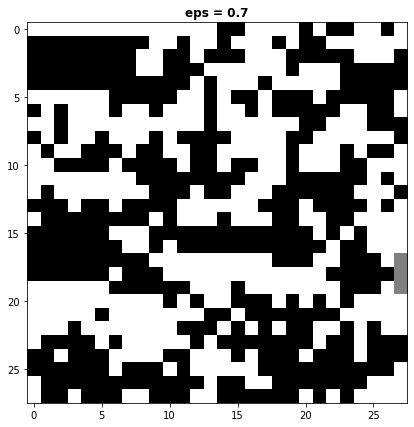

In [ ]:
def GenerateAdvFGSM (network, test_loader, epsilon):

    count = 0
    adv_batch_datasets = []
      
    for batch_idx, (data, target) in enumerate(test_loader):

        #copy of tensor
        copied_data = data.detach().clone()
        data.requires_grad = True

        for param in network.parameters():
            param.requires_grad = False

        preds = network.forward(data)
        copied_data.requires_grad = True        
        preds2 = network.forward(copied_data)
        copied_preds = torch.argmax(preds2, dim=1) #print(preds2.size(), copied_preds.size()) #torch.Size([512, 10]) and torch.Size([512])
        copied_loss = network.cost(preds2, target)
        network.zero_grad() 
        copied_loss.backward()

        # Collect gradient of input 
        copied_data_grad = copied_data.grad

        # Create adv examples using FGSM
        delta, perturbed_data = fgsm_attack(copied_data, epsilon, copied_data_grad)

        # Save perturbed_data in Dataset
        current_batch_dataset = torch.utils.data.TensorDataset(perturbed_data.detach(), target) #Note .detach() to remove from grad graph
        adv_batch_datasets.append(current_batch_dataset)
        adv_dataset = torch.utils.data.ConcatDataset(adv_batch_datasets)
        print("len(adv_dataset) increasing every batch -", len(adv_dataset))

        # Load Dataset into a dataloader
        adv_train_loader = torch.utils.data.DataLoader(
            adv_dataset, 
            batch_size=512, 
            shuffle=False)
        
        # len(adv_train_loader.dataset)) #10000
    
    return delta, adv_train_loader, adv_dataset
    
epsilon = 0.7
delta, adv_train_loader, adv_dataset = GenerateAdvFGSM (network, test_loader, epsilon)

#Plotting noise (epsilon*signed_grad)
fig = plt.figure(figsize=(10, 7))
rows = 1; columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(delta.detach().numpy()[0][0], cmap='gray')
plt.title("eps = 0.7", fontweight="bold")



For epsilon =  0.7 

Misclassification no 1 found - on Index * 1 *
Misclassification no 2 found - on Index * 4 *
Misclassification no 3 found - on Index * 6 *
Misclassification no 4 found - on Index * 7 *
Misclassification no 5 found - on Index * 8 *

 ------> Randomly selecting index * 6 * from above to display image 

Original Image - 
	Predicted label:  4 	 Target :  4

Perturbed Image - 
	Predicted label : 8 	 Target :  4




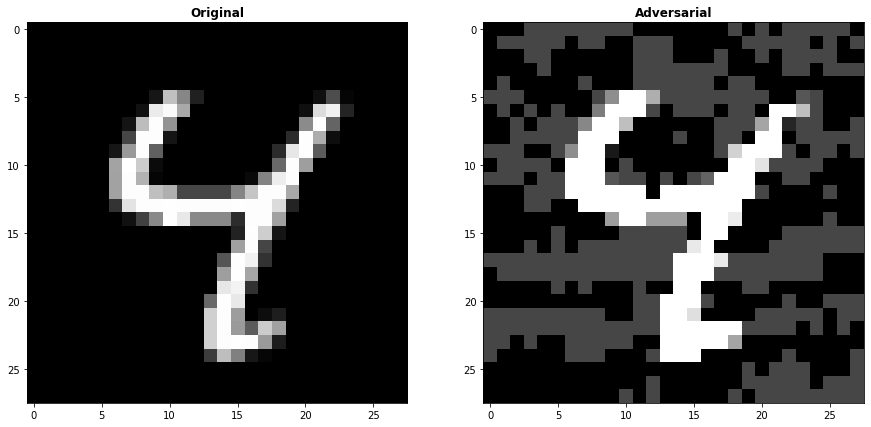

In [ ]:
# Find 5 example adversarial images that are actually misclassified (Not all adv images are misclassified) ---- For DEMO

adv_ex_misclassified = []
adv_indices = []
count=0; i=0

print("For epsilon = ", epsilon, "\n")

for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(adv_train_loader):
        preds = network.forward(data)
        final_preds = torch.argmax(preds, dim=1)
        for i in range(512):
            if final_preds[i]!=target[i]:
                count+=1
                print("Misclassification no" , count, "found -", "on Index", "*" ,i ,"*")
                adv_ex_misclassified.append(data[i][0])
                adv_indices.append(i)
                if (count > 4): break
        break

# Select one index randomly from adv_indices to select that adv_ex_misclassified -- as we don't need to display all 5 adv_examples
from random import randrange
i = randrange(4) 
adv_index = adv_indices[i]
print("\n", "------> Randomly selecting index", "*", adv_index, "*", "from above to display image", "\n")

# Plot for demo
fig = plt.figure(figsize=(15, 11))
rows = 1; columns = 2

# show unperturbed original image from test_loader
for batch_idx, (data, target) in enumerate(test_loader):
  
    preds = network.forward(data[adv_index].unsqueeze(0))
    print("Original Image -", "\n\tPredicted label: ", torch.argmax(preds, dim=1).item(), "\t Target : ", target[adv_index].item())
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[adv_index][0], cmap='gray')
    plt.title("Original", fontweight="bold")
    break

# show perturbed image from adv_train_loader
for batch_idx, (data, target) in enumerate(adv_train_loader):
  
    preds = network.forward(data[adv_index].unsqueeze(0)) # data being passed is 1x1x28x28 # preds is Log Likelihood for image [0]
    print("\nPerturbed Image -", "\n\tPredicted label :", torch.argmax(preds, dim=1).item(), "\t Target : ", target[adv_index].item())
    print("\n")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(data[adv_index][0], cmap='gray')
    plt.title("Adversarial", fontweight="bold")
    break


In [ ]:
# Predict on adversarial data
count = 0
for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(adv_train_loader):
        preds = network.forward(data)
        
        # and give accuracy on adversarial data
        count += computeAccuracyAdversarial(batch_idx, data, target)
        print("Test Accuracy : ", "{:.2f}".format(float(count) / len(adv_dataset)*100), "%")


Test Accuracy :  2.34 %
Test Accuracy :  4.58 %
Test Accuracy :  6.76 %
Test Accuracy :  9.07 %
Test Accuracy :  11.27 %
Test Accuracy :  13.49 %
Test Accuracy :  15.86 %
Test Accuracy :  18.31 %
Test Accuracy :  20.48 %
Test Accuracy :  23.19 %
Test Accuracy :  26.07 %
Test Accuracy :  28.75 %
Test Accuracy :  31.88 %
Test Accuracy :  34.56 %
Test Accuracy :  37.04 %
Test Accuracy :  39.67 %
Test Accuracy :  42.46 %
Test Accuracy :  45.69 %
Test Accuracy :  48.38 %
Test Accuracy :  49.62 %


We will now create a new model 'network1', and train it on original training data i.e. train_loader + adversarial data i.e. adv_train_loader, i.e. Adversarial Training. We are doing this on a new NN network instance named "network1" to keep it separate from our original NN "network". The DataLoader used is going to be (adv_train_loader + train_loader).

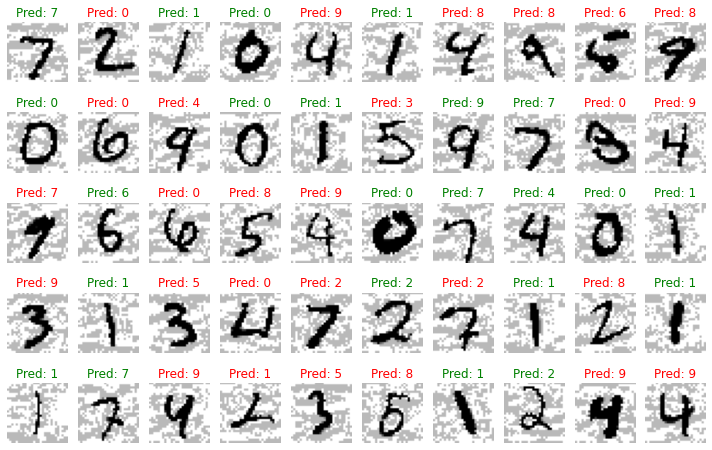

In [ ]:
# Demo of adversarial misclassifications AFTER FGSM attack, BEFORE Adversarial Training

for data,target in adv_train_loader:
    break

def plot_images(data,target,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-data[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == target[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

yp = network(data)
plot_images(data, target, yp, 5, 10)


In [ ]:
# Adversarial Training for FGSM

network1 = MnistCNN() 
optimizer = optim.Adam(network1.parameters(), lr=learning_rate)

both_datasets = torch.utils.data.ConcatDataset([train_dataset, adv_dataset])
print(len(both_datasets))
both_loader = torch.utils.data.DataLoader(both_datasets, batch_size = 512)

num_epochs = 1
for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(both_loader):
        
        try: 
            preds = network1(data)
            loss = network1.cost(preds, target)
            print("------------------------------------------------------")
            print("------------------------------------------------------")
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            print('Epoch:', '{:3d}'.format(epoch + 1),
                '\tBatch:', '{:3d}'.format(batch_idx + 1),
                '\tLoss:', '{:10.5f}'.format(loss.item()))
                # '\tdata.requires_grad', data.requires_grad)
            
        except:
            print(preds.size(), target.size(), loss, data.requires_grad)
        

Epoch:   1 	Batch:  45 	Loss:    0.19072
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  46 	Loss:    0.08733
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  47 	Loss:    0.14262
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  48 	Loss:    0.13519
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  49 	Loss:    0.18652
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  50 	Loss:    0.12098
------------------------------------------------------
------------------------------------------------------
Epoch:   1 	Batch:  51 	Loss:    0.13174
-----------------------------------------------------

Let's test again on adversarial examples and see if the prediction is better than last time.

In [ ]:
# Compute accuracy of network1 on adversarial test set
def computeAccuracy1Adversarial(batch_idx, perturbed_data, target):
    final_pred = torch.argmax(network1.forward(perturbed_data), dim=1)
    return torch.sum(final_pred == target).detach().item()

count = 0
# Making prediction and show accuracy of network1 on adversarial data
for batch_idx, (data, target) in enumerate(adv_train_loader):
    count += computeAccuracy1Adversarial(batch_idx, data, target)
    print("Post AdvTraining Adv data Accuracy : ", "{:.2f}".format(float(count) / len(adv_dataset)*100), "%")

count = 0
# Making prediction and show accuracy of network1 on original test data
for batch_idx, (data, target) in enumerate(test_loader):
    count += computeAccuracy1Adversarial(batch_idx, data, target)
    print("Test Accuracy original: ", "{:.2f}".format(float(count) / len(adv_dataset)*100), "%")


Post AdvTraining Adv data Accuracy :  5.03 %
Post AdvTraining Adv data Accuracy :  10.05 %
Post AdvTraining Adv data Accuracy :  15.00 %
Post AdvTraining Adv data Accuracy :  19.96 %
Post AdvTraining Adv data Accuracy :  24.93 %
Post AdvTraining Adv data Accuracy :  29.98 %
Post AdvTraining Adv data Accuracy :  34.95 %
Post AdvTraining Adv data Accuracy :  39.90 %
Post AdvTraining Adv data Accuracy :  44.85 %
Post AdvTraining Adv data Accuracy :  49.87 %
Post AdvTraining Adv data Accuracy :  54.96 %
Post AdvTraining Adv data Accuracy :  59.98 %
Post AdvTraining Adv data Accuracy :  64.99 %
Post AdvTraining Adv data Accuracy :  70.07 %
Post AdvTraining Adv data Accuracy :  75.18 %
Post AdvTraining Adv data Accuracy :  80.27 %
Post AdvTraining Adv data Accuracy :  85.35 %
Post AdvTraining Adv data Accuracy :  90.42 %
Post AdvTraining Adv data Accuracy :  95.48 %
Post AdvTraining Adv data Accuracy :  98.07 %
Test Accuracy original:  3.09 %
Test Accuracy original:  6.17 %
Test Accuracy ori

For - eps = 0.7 and Num_epochs = 5 : 

Prediction of our model 'network' was reduced to 61.44% for adv_train_loader as compared to 98.24% for original test_loader.
Now after adversarial training, it's up to 99%. Hence adversarial training was one great way to defend from FGSM attack!


Original train time – 3m 24s, 
Original Training Accuracy 98.71%


Epsilon   | Test Data Original  | Adv Data         | Adv Data post Adv Training | Test Data post Adv Training 
--------- |--------------------|------------------|----------------------------|-----------------------------|
0         | 98.24%             |    97.54%        |             99.44 %        |             98.55%          |
0.7       |     NA             |    61.44%        |             99.59 %        |             98.35%          |

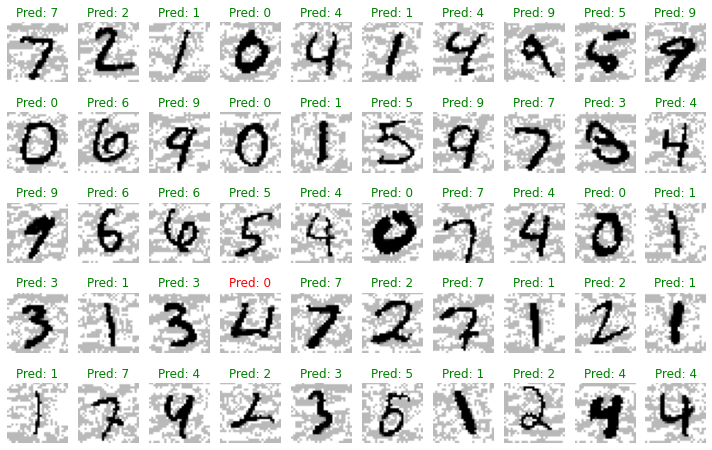

In [ ]:
# Demo for adversarial misclassifications AFTER adversarial training

for data,target in adv_train_loader:
    break

yp = network1(data)
plot_images(data, target, yp, 5, 10)

Performing one pixel attack now. One way of finding vulnerable images in the dataset.

In [ ]:
# Returns actuals[], predictions[] in form of lists

def test_label_predictions(network, test_loader):
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            output = network.forward(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction)) #setting the target tensor size to same as prediction tensor size
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(network, test_loader)

In [ ]:
def set_pixel(data, i, j, value=1.0):
    data[0][i][j] = value
    return data

#Returns misclasssified images
def misclassified_images(actuals, predictions):
    vulnerables = []
    for i in range(len(actuals)):
        if actuals[i] != predictions[i]:
            vulnerables.append(i)
    return set(vulnerables) # set of vulnerable indices in original opa_test_loader 


actuals, predictions = test_label_predictions(network, test_loader)
# print("Number of actuals before attack", len(actuals), "Number of predictions before attack", len(predictions)) #10,000 10,000
base_misclassifieds = misclassified_images(actuals, predictions) #base_misclassifieds is the set of all original vulnerable image indices (without attack)
print("Total base misclassifieds :", len(base_misclassifieds), "out of", len(test_loader.dataset)) 
print("Original test accuracy - ", 100*(len(test_loader.dataset) - len(base_misclassifieds)) / len(test_loader.dataset), "%")

vulnerable_images = set([])

for i in range(12, 13):
    for j in range(12, 13):

        #creating dataset of images that are victim of one-pixel attack
        test_dataset = datasets.MNIST(root='./data', 
                                train=False, 
                                download=True, 
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Lambda(lambda x: set_pixel(x, i, j)),
                                    transforms.Normalize((0.1307,), (0.3081,)),
                            ]))

        #creating dataloader of potential adversarial images created by one-pixel attack
        opa_test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)
        #print(len(test_dataset), len(opa_test_loader)) # 10,000 20

        actuals, predictions = test_label_predictions(network, opa_test_loader)
        # print("Number of actuals before attack", len(actuals), "Number of predictions before attack", len(predictions)) #10,000 10,000
        #print(actuals, "\n", predictions) #prints all targets and predictions in list form
        #print(len(actuals), "\n", len(predictions)) #10,000 10,000

        misclassifieds = misclassified_images(actuals, predictions) #misclassifieds is the set of all misclassified/vulnerable images' indices (without+with attack)
        print(len(misclassifieds), "len(misclassifieds)")
        # print("m =", len(misclassifieds)) #175
        actual_vulnerables = misclassifieds.difference(base_misclassifieds) # set with only the vulnerable image indices after attack
        # print("av =", len(actual_vulnerables)) #0

        # print('(%s, %s) vulnerables: %s' % (i, j, actual_vulnerables))
        print(len(actual_vulnerables), "Vulnerables images found for pixel location", i, 'x', j, ': On these indices', actual_vulnerables)

        for a in actual_vulnerables:
            print('--> %s is %s, classified as %s' % (a, actuals[a], predictions[a]))
        vulnerable_images.update(actual_vulnerables)

total_misclassifieds = len(actual_vulnerables) + len(base_misclassifieds)
print("Post Attack Test Accuracy - ", 100*(len(test_loader.dataset) - total_misclassifieds) / len(test_loader.dataset), "%")


Total base misclassifieds : 237 out of 10000
Original test accuracy -  97.63 %
256 len(misclassifieds)
28 Vulnerables images found for pixel location 12 x 12 : On these indices {4482, 774, 7432, 3976, 9867, 1678, 5654, 3225, 282, 4507, 926, 2976, 6561, 9893, 551, 4391, 6572, 9024, 5835, 9036, 1357, 3410, 1883, 613, 4837, 7915, 3316, 2047}
--> 4482 is 2, classified as 3
--> 774 is 4, classified as 9
--> 7432 is 7, classified as 3
--> 3976 is 7, classified as 1
--> 9867 is 2, classified as 8
--> 1678 is 2, classified as 9
--> 5654 is 7, classified as 9
--> 3225 is 7, classified as 9
--> 282 is 7, classified as 3
--> 4507 is 1, classified as 2
--> 926 is 2, classified as 8
--> 2976 is 6, classified as 5
--> 6561 is 7, classified as 9
--> 9893 is 2, classified as 8
--> 551 is 7, classified as 3
--> 4391 is 7, classified as 9
--> 6572 is 1, classified as 3
--> 9024 is 7, classified as 3
--> 5835 is 7, classified as 9
--> 9036 is 7, classified as 3
--> 1357 is 4, classified as 9
--> 3410 is 

All actual vulnerable image indices:  [4482, 774, 7432, 3976, 9867, 1678, 5654, 3225, 282, 4507, 926, 2976, 6561, 9893, 551, 4391, 6572, 9024, 5835, 9036, 1357, 3410, 1883, 613, 4837, 7915, 3316, 2047]

Randomly selecting index 1883 for displaying the vulnerable image

 --> 1883 is 7, classified as 9


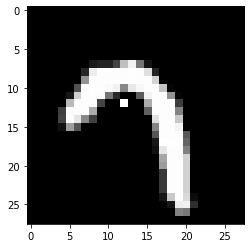

In [ ]:
# Plot one such vulnerable image

actual_vulnerable = list(actual_vulnerables)
print("All actual vulnerable image indices: ", actual_vulnerable)
choice = np.random.choice(actual_vulnerable)
print("\nRandomly selecting index", choice, "for displaying the vulnerable image")
print("\n", '--> %s is %s, classified as %s' % (choice, actuals[choice], predictions[choice]))
x, _ = test_dataset[choice] 
plt.imshow(x.numpy()[0], cmap='gray')
